<a href="https://colab.research.google.com/github/Susanati/RecommendationSystem/blob/main/Sistema_de_recomenda%C3%A7%C3%A3o_de_livros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

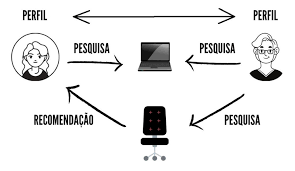

**O que é sistema de recomendação?**

Um sistema de recomendação é uma tecnologia que fornece sugestões personalizadas aos usuários, com o objetivo de ajudá-los a descobrir itens ou conteúdos relevantes. Esses sistemas são amplamente utilizados em várias plataformas online, como lojas virtuais, serviços de streaming de vídeo, redes sociais e sites de notícias.

A ideia básica por trás de um sistema de recomendação é analisar as preferências e o comportamento do usuário, bem como outros dados relevantes, e usar algoritmos para gerar sugestões que atendam às suas necessidades e interesses específicos. Esses algoritmos podem ser baseados em diferentes técnicas, como filtragem colaborativa, filtragem baseada em conteúdo, aprendizado de máquina e mineração de dados.

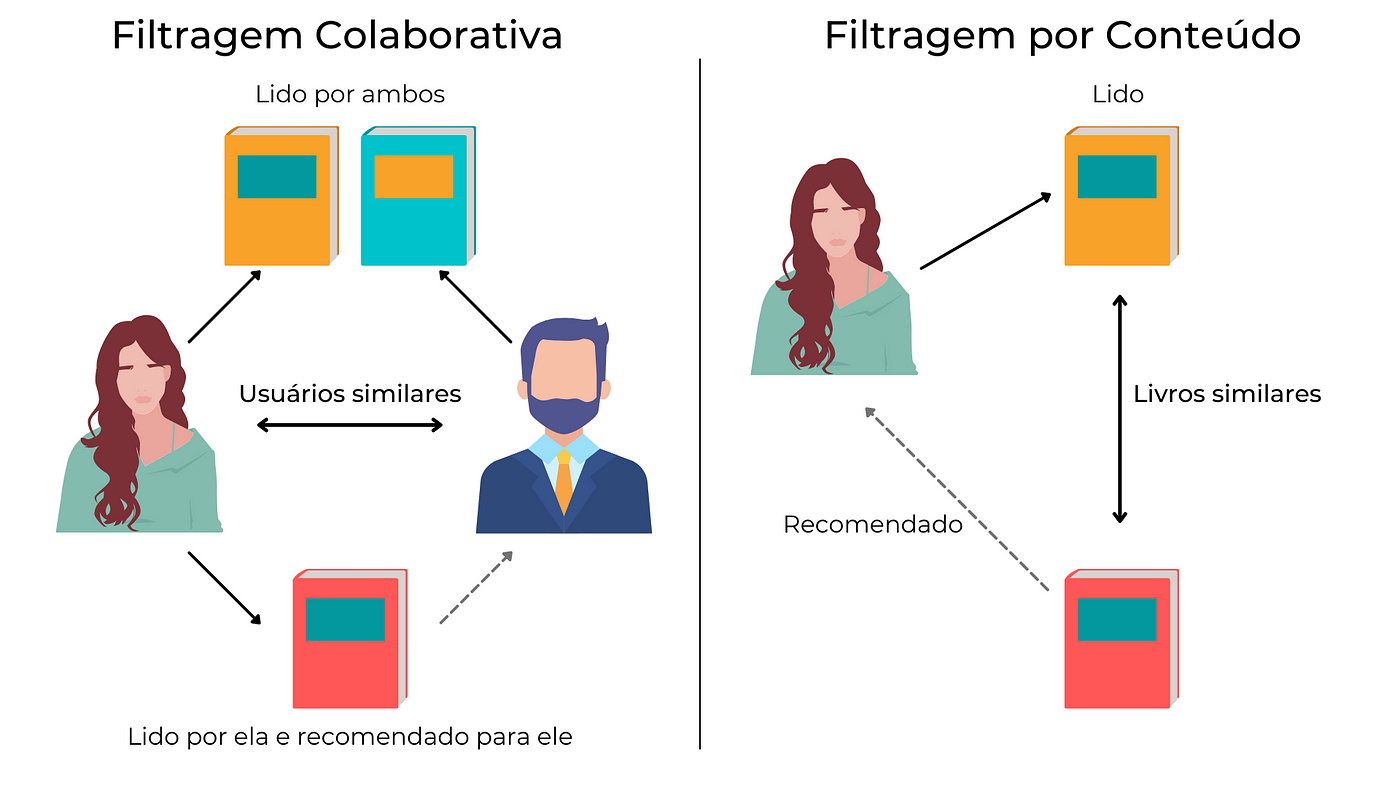

**A filtragem colaborativa** é uma abordagem comum, que utiliza informações coletadas de um grande número de usuários para identificar padrões de comportamento e recomendar itens com base nas preferências de usuários semelhantes. Por exemplo, um sistema de recomendação de filmes pode sugerir filmes com base nas avaliações de outros usuários com gostos semelhantes.

**A filtragem baseada em conteúdo**, por sua vez, analisa as características e atributos dos itens em si, e não apenas as interações dos usuários. Por exemplo, um sistema de recomendação de música pode sugerir novas faixas com base nas características musicais de músicas que o usuário já ouviu e gostou.

Os sistemas de recomendação têm como objetivo melhorar a experiência do usuário, ajudando-os a encontrar itens relevantes de forma mais eficiente e descobrir novos conteúdos que possam despertar seu interesse. Eles são amplamente utilizados para recomendar produtos para compra, filmes e programas de TV para assistir, músicas para ouvir, notícias para ler e muito mais.

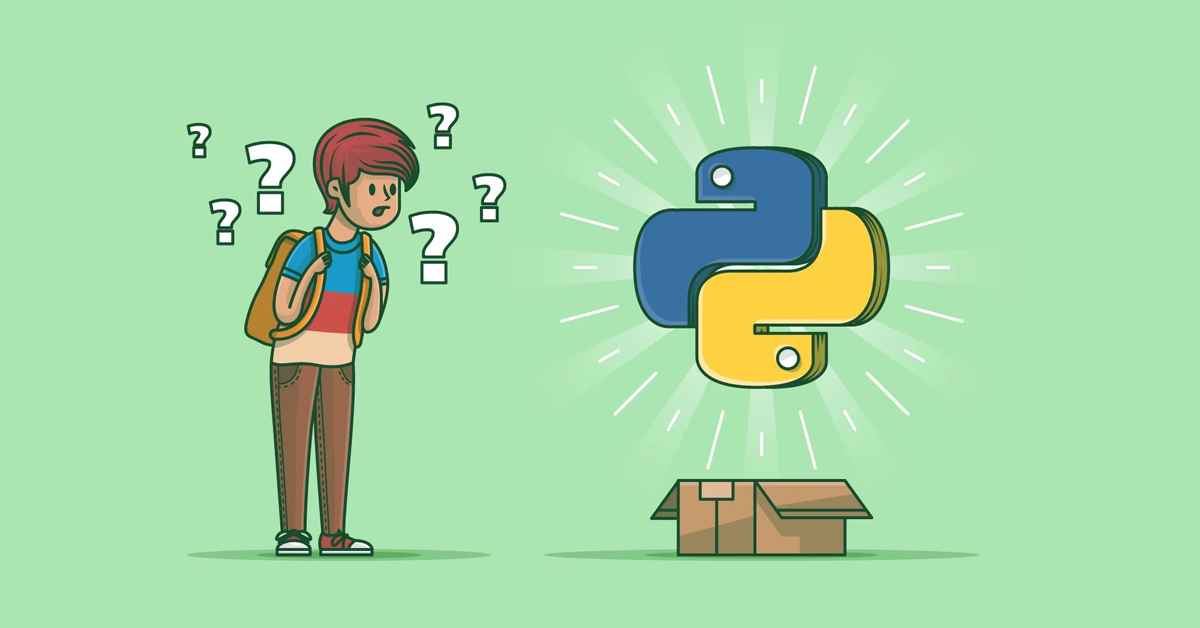

**1° Problema negócio**

Método de filtragem baseada em colaboração;
Máquina preditiva com vase nas escolhas de leituras de outras pessoas, livro seja recomendado a outras pessoas com interesses semeelhantes.

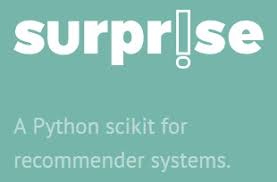

**Usando biblioteca Surprise Python**

Surprise é uma biblioteca de código aberto que oferece suporte a várias abordagens de filtragem colaborativa, como filtragem baseada em memória e filtragem baseada em modelo.

A biblioteca Surprise oferece uma interface simples e intuitiva para trabalhar com dados de avaliação e construir sistemas de recomendação. Ela fornece algoritmos pré-implementados, como SVD (decomposição em valores singulares), KNN (k-Nearest Neighbors) e outras variações que você pode usar para construir seu sistema de recomendação colaborativa.

In [ ]:
pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp39-cp39-linux_x86_64.whl size=3195798 sha256=12e80fec41a9d592f3a0e66557a2767340bca3c83a77e8f1ff00cb5edbb9cd1c
  Stored in directory: /root/.cache/pip/wheels/c6/3a/46/9b17b3512bdf283c6cb84f59929cdd5199d4e754d596d22784
Successfully built scikit-surprise


In [ ]:
# Bibliotecas
from surprise import Dataset
from surprise import KNNBasic
from surprise.model_selection import train_test_split


In [ ]:
from surprise import Dataset
import pandas as pd

**Carregar Base de dados de livros**

In [ ]:
books=pd.read_csv('/content/BX-Books.csv',sep=';',encoding='latin-1', error_bad_lines=False)

<ipython-input-25-3e4f6899687c>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books=pd.read_csv('/content/BX-Books.csv',sep=';',encoding='latin-1', error_bad_lines=False)
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: exp

In [ ]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


**Carregar a Base de dados do Usuario**

In [ ]:
users=pd.read_csv('/content/BX-Users.csv',sep=';',encoding='latin-1', error_bad_lines=False)

<ipython-input-30-15addb663438>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users=pd.read_csv('/content/BX-Users.csv',sep=';',encoding='latin-1', error_bad_lines=False)


In [ ]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
#base de Ratings
ratings=pd.read_csv('/content/BX-Book-Ratings.csv',sep=';',encoding='latin-1', error_bad_lines=False)

<ipython-input-34-ce9ad19e382e>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings=pd.read_csv('/content/BX-Book-Ratings.csv',sep=';',encoding='latin-1', error_bad_lines=False)


In [ ]:
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [ ]:
# Combinar os conjuntos de dados
#data = data1.build_full_trainset().build_testset() + data2.build_full_trainset().build_testset()

**Ainda em construção**